In [0]:
import os
os.getcwd()


'/content'

In [0]:
from matplotlib import cm,pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

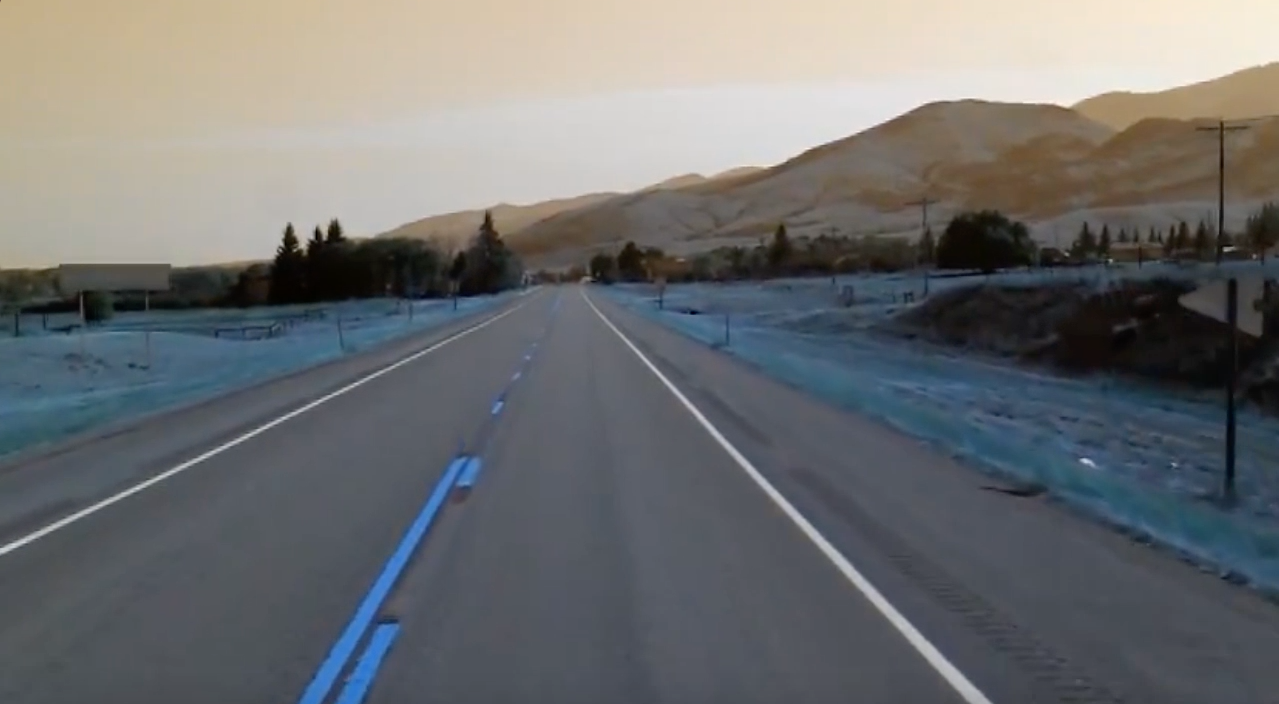

In [0]:
img=cv2.imread('/content/drive/My Drive/SAMPLE_DATA/road/test_image.jpg')
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
cv2_imshow(img)

In [0]:
print(img.shape)

(704, 1279, 3)


In [0]:
def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blurred=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blurred,50,150)
    return canny

In [0]:
def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)  #bgr
    return line_image


In [0]:
def region_of_interest(image):
    height=image.shape[0]
    triangle=np.array([(300,height),(1000,height),(570,260)],'int32')
    mask=np.zeros_like(image)
    cv2.fillConvexPoly(mask,triangle,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image


In [0]:
def make_coordinates(image,line_parameters):
    slope, intercept = line_parameters
    # Sets initial y-coordinate as height from top down (bottom of the frame)
    y1 = image.shape[0]
    # Sets final y-coordinate as 150 above the bottom of the frame
    y2 = int(y1*3/5)
    # Sets initial x-coordinate as (y1 - b) / m since y1 = mx1 + b
    x1 = int((y1 - intercept) / slope)
    # Sets final x-coordinate as (y2 - b) / m since y2 = mx2 + b
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])
    

In [0]:
def average_slope_intercept(image,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            parameters=np.polyfit(( x1,x2),(y1,y2),1)
            slope=parameters[0]
            intercept=parameters[1]
            if slope<0:
                left_fit.append((slope,intercept))
            else :
                right_fit.append((slope,intercept))
    left_fit_average=np.average(left_fit,axis=0)
    right_fit_average=np.average(right_fit,axis=0)
    left_line=make_coordinates(image,left_fit_average)
    right_line=make_coordinates(image,right_fit_average)
    return np.array([left_line,right_line])




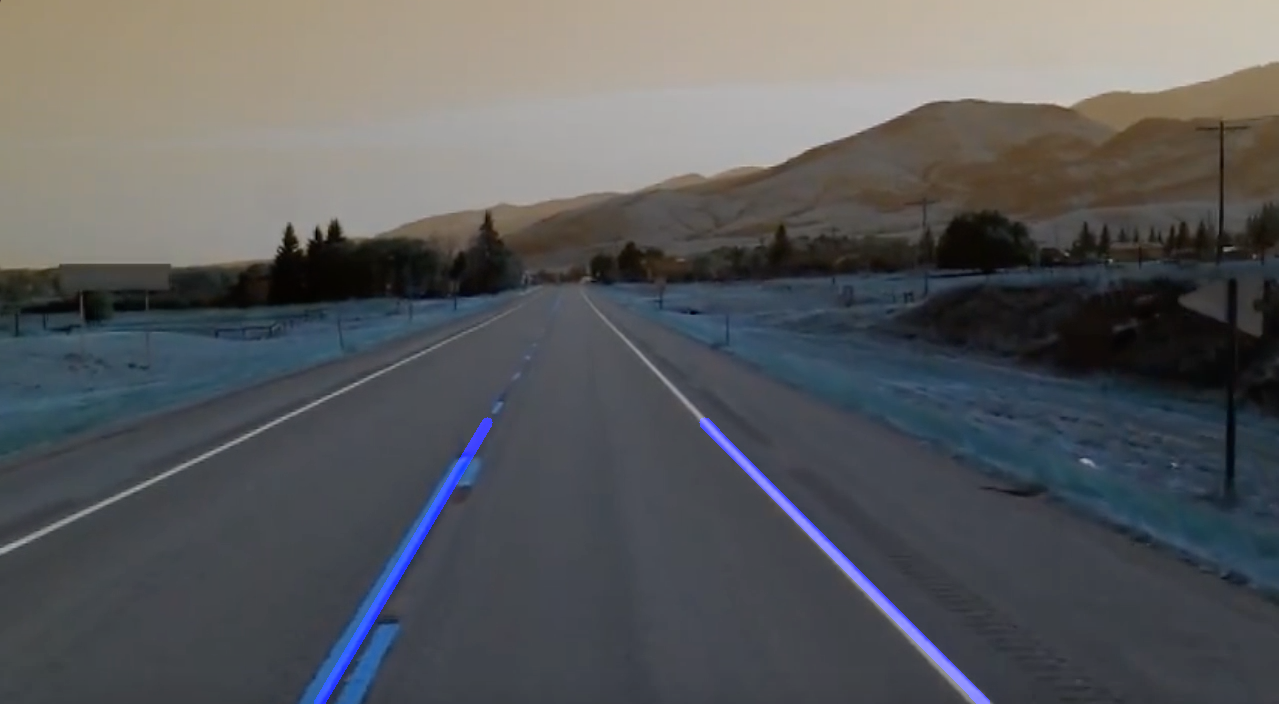

In [0]:
lane_image=np.copy(img)
canny_image=canny(img)
cropped_image=region_of_interest(canny_image)
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)

averaged_line=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,averaged_line)
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
cv2_imshow(combo_image)

In [0]:
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (704, 1279))
cap=cv2.VideoCapture('/content/drive/My Drive/SAMPLE_DATA/road/test2.mp4')
while(cap.isOpened()):
    _,frame=cap.read()
    canny_image=canny(frame)
    cropped_image=region_of_interest(canny_image)
    lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    averaged_line=average_slope_intercept(lane_image,lines)
    line_image=display_lines(lane_image,averaged_line)
    combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
    out.write(combo_image)
out.release()


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: ignored